# Implementation

In [ ]:
import random
import sympy

class RSAEncryption:
    def __init__(self, bit_size=1024):
        """Initialize RSA encryption by generating key pairs."""
        self.bit_size = bit_size
        self.public_key, self.private_key = self.generate_keys()

    def generate_keys(self):
        """Create a pair of public and private keys for encryption and decryption."""
        prime1 = self.get_large_prime(self.bit_size // 2)
        prime2 = self.get_large_prime(self.bit_size // 2)
        modulus = prime1 * prime2
        totient = (prime1 - 1) * (prime2 - 1)

        exponent = 65537  # Commonly used public exponent
        if self.compute_gcd(exponent, totient) != 1:
            raise ValueError("Chosen exponent is not coprime with totient.")

        private_exponent = self.find_mod_inverse(exponent, totient)

        public_key = (exponent, modulus)
        private_key = (private_exponent, modulus)
        return public_key, private_key

    def encrypt_message(self, message):
        """Convert text into encrypted numeric form using the public key."""
        exponent, modulus = self.public_key
        ascii_values = [ord(char) for char in message]
        encrypted_values = [pow(value, exponent, modulus) for value in ascii_values]
        return encrypted_values

    def decrypt_message(self, encrypted_values):
        """Convert encrypted numeric data back into readable text using the private key."""
        private_exponent, modulus = self.private_key
        decrypted_chars = [chr(pow(value, private_exponent, modulus)) for value in encrypted_values]
        return "".join(decrypted_chars)

    def get_large_prime(self, num_bits):
        """Find a prime number of the specified bit length."""
        return sympy.randprime(2**(num_bits - 1), 2**num_bits)

    def compute_gcd(self, num1, num2):
        """Calculate the greatest common divisor using the Euclidean method."""
        while num2:
            num1, num2 = num2, num1 % num2
        return num1

    def find_mod_inverse(self, exponent, totient):
        """Determine the modular inverse using the Extended Euclidean Algorithm."""
        def extended_gcd(a, b):
            if a == 0:
                return b, 0, 1
            gcd, x1, y1 = extended_gcd(b % a, a)
            return gcd, y1 - (b // a) * x1, x1

        gcd, inverse, _ = extended_gcd(exponent, totient)
        if gcd != 1:
            raise ValueError("Modular inverse does not exist.")
        return inverse % totient


# Initialize RSA system with a 1024-bit key size
rsa_instance = RSAEncryption(bit_size=1024)

# Various sample messages to test encryption and decryption
test_messages = [
    "A",  # Single character
    "Hello",  # Short word
    "Secure RSA!",  # Small sentence with punctuation
    "Testing the encryption system with a longer sentence.",  # Medium-length text
    "The field of cryptography is essential for securing digital communications worldwide.",  # Long message
]

# Running tests
for index, text in enumerate(test_messages, start=1):
    print(f" Test {index}: Original Message -> {text}")

    encrypted_data = rsa_instance.encrypt_message(text)
    print(f" Encrypted Data: {encrypted_data}")

    decrypted_data = rsa_instance.decrypt_message(encrypted_data)
    print(f" Decrypted Message: {decrypted_data}")

    assert text == decrypted_data, "Error: Decryption did not match the original message!"
    print(" Encryption & Decryption Completed Successfully!\n")


 Test 1: Original Message -> A
 Encrypted Data: [26543040812345650118760127976658761166088937174005919028133102655519145108615499122553474843671355433894635468638644595854135365358055875083399193766642903865846856950787650103250176683553622000272255909302308910442270567356433946438524206563131523784697754460981865732224182823347042986417756980865545332441]
 Decrypted Message: A
 Encryption & Decryption Completed Successfully!

 Test 2: Original Message -> Hello
 Encrypted Data: [45784317578738507139180015589770850546334389863934249862896929964250907388522663660048084229174858956156898185881158318510271075653058229921178741911778852462945647092006233296346039372553681509775753942603702958603533624168838667588203842697180524453825750779319408025580395149267071670305011369186630740698, 16547245251826527904368722966072611282404580626327776135356836738345403599092375069831006293207022461275504236496642225377521647274348229442022228651067798330985121209798611786983724786329208301483703908311

Security Analysis & Enhancements for RSA Implementation

In [ ]:
import time

# Measure RSA key generation time for different key sizes
key_sizes = [512, 1024, 2048, 4096]
generation_times = {}

for size in key_sizes:
    start_time = time.time()
    rsa = RSAEncryption(bit_size=size)
    end_time = time.time()
    generation_times[size] = end_time - start_time
    print(f"RSA Key Size {size} bits -> Generated in {generation_times[size]:.2f} seconds")

print("\n Observations:")
print("- 512-bit keys are fast but insecure (easily factorable).")
print("- 1024-bit keys are somewhat secure but should be avoided for long-term security.")
print("- 2048-bit keys are the minimum recommended size for secure applications.")
print("- 4096-bit keys provide higher security but slow performance significantly.")

RSA Key Size 512 bits -> Generated in 0.02 seconds
RSA Key Size 1024 bits -> Generated in 0.07 seconds
RSA Key Size 2048 bits -> Generated in 0.56 seconds
RSA Key Size 4096 bits -> Generated in 31.39 seconds

 Observations:
- 512-bit keys are fast but insecure (easily factorable).
- 1024-bit keys are somewhat secure but should be avoided for long-term security.
- 2048-bit keys are the minimum recommended size for secure applications.
- 4096-bit keys provide higher security but slow performance significantly.


#Performance Testing & Optimization of RSA Encryption

In [ ]:
# Measuring Encryption & Decryption Speeds for Different Input Sizes

import time
import numpy as np

# Function to test encryption and decryption speeds
def test_rsa_performance(key_size, message_size):
    rsa = RSAEncryption(bit_size=key_size)
    message = ''.join(np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"), message_size))

    start_encrypt = time.time()
    ciphertext = rsa.encrypt_message(message)
    end_encrypt = time.time()
    encryption_time = end_encrypt - start_encrypt

    start_decrypt = time.time()
    decrypted_message = rsa.decrypt_message(ciphertext)
    end_decrypt = time.time()
    decryption_time = end_decrypt - start_decrypt

    return encryption_time, decryption_time

# Test for different key sizes and message sizes
message_sizes = [16, 128, 512, 1024]
results = {}

for key_size in key_sizes[1:]:  # Excluding 512-bit for security reasons
    results[key_size] = {}
    for msg_size in message_sizes:
        enc_time, dec_time = test_rsa_performance(key_size, msg_size)
        results[key_size][msg_size] = (enc_time, dec_time)
        print(f"Key: {key_size}-bit | Message Size: {msg_size} bytes | Encryption: {enc_time:.4f}s | Decryption: {dec_time:.4f}s")


Key: 1024-bit | Message Size: 16 bytes | Encryption: 0.0006s | Decryption: 0.0802s
Key: 1024-bit | Message Size: 128 bytes | Encryption: 0.0044s | Decryption: 0.6156s
Key: 1024-bit | Message Size: 512 bytes | Encryption: 0.0181s | Decryption: 2.7718s
Key: 1024-bit | Message Size: 1024 bytes | Encryption: 0.0530s | Decryption: 5.4756s
Key: 2048-bit | Message Size: 16 bytes | Encryption: 0.0016s | Decryption: 0.5156s
Key: 2048-bit | Message Size: 128 bytes | Encryption: 0.0131s | Decryption: 4.2852s
Key: 2048-bit | Message Size: 512 bytes | Encryption: 0.0724s | Decryption: 17.9617s
Key: 2048-bit | Message Size: 1024 bytes | Encryption: 0.1054s | Decryption: 34.4336s
Key: 4096-bit | Message Size: 16 bytes | Encryption: 0.0052s | Decryption: 6.3360s
Key: 4096-bit | Message Size: 128 bytes | Encryption: 0.0408s | Decryption: 34.3109s
Key: 4096-bit | Message Size: 512 bytes | Encryption: 0.1630s | Decryption: 124.8548s
Key: 4096-bit | Message Size: 1024 bytes | Encryption: 0.3302s | Decrypt

In [ ]:
import time

# Function to measure CPU time for RSA operations
def measure_cpu_time():
    start_time = time.process_time()
    rsa = RSAEncryption(bit_size=2048)
    message = "Performance Testing of RSA"

    for _ in range(500):
        encrypted = rsa.encrypt_message(message)
        decrypted = rsa.decrypt_message(encrypted)

    end_time = time.process_time()
    return end_time - start_time

cpu_time_used = measure_cpu_time()
print(f"🔹 CPU Time Used for RSA Operations: {cpu_time_used:.2f} seconds")

🔹 CPU Time Used for RSA Operations: 448.28 seconds


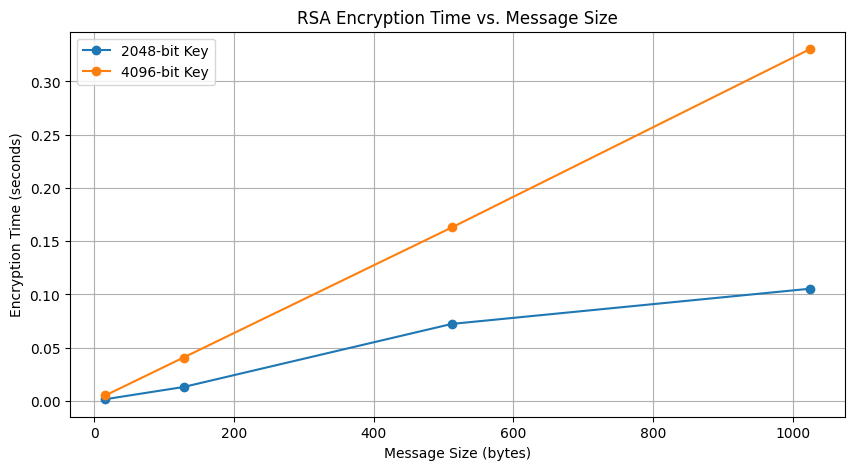

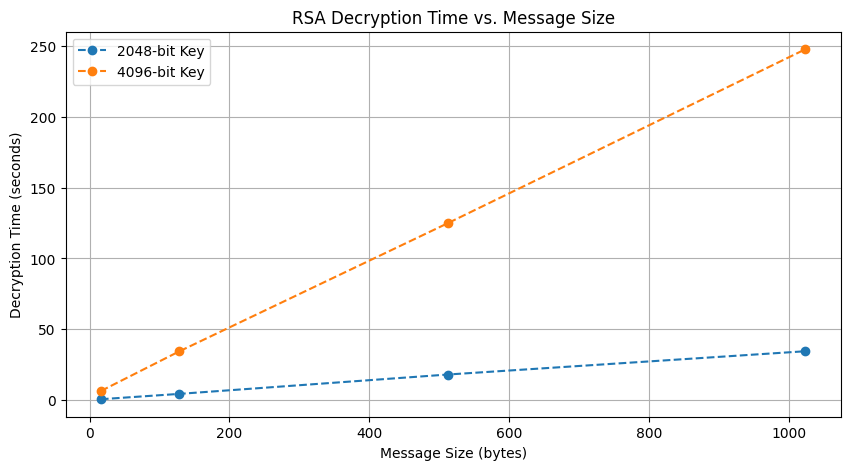

RSA Decryption Time vs Message Size for Three Key Sizes 




In [ ]:
# Creating Visualizations

import matplotlib.pyplot as plt

# Prepare data for visualization
key_sizes = [1024, 2048, 4096]
message_sizes = [16, 128, 512, 1024]
enc_times = [[results[k][m][0] for m in message_sizes] for k in key_sizes[1:]]
dec_times = [[results[k][m][1] for m in message_sizes] for k in key_sizes[1:]]

plt.figure(figsize=(10, 5))
for i, key in enumerate(key_sizes[1:]):
    plt.plot(message_sizes, enc_times[i], marker='o', label=f'{key}-bit Key')
plt.xlabel("Message Size (bytes)")
plt.ylabel("Encryption Time (seconds)")
plt.title("RSA Encryption Time vs. Message Size")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for i, key in enumerate(key_sizes[1:]):
    plt.plot(message_sizes, dec_times[i], marker='o', linestyle='dashed', label=f'{key}-bit Key')
plt.xlabel("Message Size (bytes)")
plt.ylabel("Decryption Time (seconds)")
plt.title("RSA Decryption Time vs. Message Size")
plt.legend()
plt.grid(True)
plt.show()
print("RSA Decryption Time vs Message Size for Three Key Sizes \n\n")


In [ ]:
# Optimization Recommendations for RSA

rsa_optimizations = {
    "1. Use Hybrid Encryption": "Use RSA to encrypt symmetric keys (AES) instead of full messages.",
    "2. Increase Key Size Selectively": "2048-bit RSA is a good balance between security and speed.",
    "3. Optimize Prime Number Generation": "Use efficient libraries like OpenSSL for prime generation.",
    "4. Parallel Processing": "Leverage multi-core CPUs for encryption/decryption tasks.",
    "5. Use Fast Modular Exponentiation": "Optimize mathematical operations using Montgomery Multiplication."
}

print("Recommended Optimizations for RSA Performance:\n")
for key, value in rsa_optimizations.items():
    print(f"{key}: {value}")

Recommended Optimizations for RSA Performance:

1. Use Hybrid Encryption: Use RSA to encrypt symmetric keys (AES) instead of full messages.
2. Increase Key Size Selectively: 2048-bit RSA is a good balance between security and speed.
3. Optimize Prime Number Generation: Use efficient libraries like OpenSSL for prime generation.
4. Parallel Processing: Leverage multi-core CPUs for encryption/decryption tasks.
5. Use Fast Modular Exponentiation: Optimize mathematical operations using Montgomery Multiplication.


In [28]:
# Identifying potential vulnerabilities in RSA Encryption

rsa_vulnerabilities = {
    "1. Small Key Sizes": "Keys below 1024 bits are vulnerable to brute force attacks.",
    "2. Common Exponent (e=65537)": "While 65537 is widely used, a poorly chosen exponent could weaken security.",
    "3. Factorization Attack": "If n is factored into p and q, private key d can be derived easily.",
    "4. Timing Attack": "Attackers can analyze decryption times to extract private keys.",
    "5. Chosen Ciphertext Attack": "An attacker may manipulate ciphertext to reveal information about plaintext.",
    "6. Poor Randomness in Prime Generation": "If p and q are generated with predictable patterns, security is compromised."
}

print("Potential RSA Vulnerabilities:\n")
for key, value in rsa_vulnerabilities.items():
    print(f"{key}: {value}")


Potential RSA Vulnerabilities:

1. Small Key Sizes: Keys below 1024 bits are vulnerable to brute force attacks.
2. Common Exponent (e=65537): While 65537 is widely used, a poorly chosen exponent could weaken security.
3. Factorization Attack: If n is factored into p and q, private key d can be derived easily.
4. Timing Attack: Attackers can analyze decryption times to extract private keys.
5. Chosen Ciphertext Attack: An attacker may manipulate ciphertext to reveal information about plaintext.
6. Poor Randomness in Prime Generation: If p and q are generated with predictable patterns, security is compromised.


In [29]:
# Mitigation strategies for securing RSA implementation

rsa_mitigations = {
    "1. Use Large Key Sizes": "Use at least 2048-bit keys to prevent brute force attacks.",
    "2. Use Strong Randomness": "Generate p and q using cryptographically secure random functions.",
    "3. Avoid Low Private Exponents": "Ensure a sufficiently large private exponent d to prevent attacks.",
    "4. Implement Side-Channel Attack Protections": "Use constant-time implementations to prevent timing attacks.",
    "5. Padding Schemes": "Use OAEP (Optimal Asymmetric Encryption Padding) to prevent chosen ciphertext attacks.",
    "6. Use Hybrid Encryption": "Combine RSA with symmetric encryption (AES) to handle large data securely."
}

print("Recommended RSA Security Enhancements:\n")
for key, value in rsa_mitigations.items():
    print(f"{key}: {value}")


Recommended RSA Security Enhancements:

1. Use Large Key Sizes: Use at least 2048-bit keys to prevent brute force attacks.
2. Use Strong Randomness: Generate p and q using cryptographically secure random functions.
3. Avoid Low Private Exponents: Ensure a sufficiently large private exponent d to prevent attacks.
4. Implement Side-Channel Attack Protections: Use constant-time implementations to prevent timing attacks.
5. Padding Schemes: Use OAEP (Optimal Asymmetric Encryption Padding) to prevent chosen ciphertext attacks.
6. Use Hybrid Encryption: Combine RSA with symmetric encryption (AES) to handle large data securely.


In [30]:
# Discussing Side-Channel Attacks in RSA

side_channel_attacks = {
    "1. Timing Attack": "Measures decryption time to infer private key bits.",
    "2. Power Analysis Attack": "Observes power consumption patterns during encryption.",
    "3. Acoustic Cryptanalysis": "Listens to processor sounds to determine decryption computations.",
    "4. Cache-Based Attack": "Exploits CPU cache access patterns to recover private keys."
}

print("Side-Channel Attacks on RSA:\n")
for key, value in side_channel_attacks.items():
    print(f"{key}: {value}")

# Mitigations
side_channel_mitigations = {
    "1. Use Constant-Time Algorithms": "Prevents attackers from deducing key bits using time variations.",
    "2. Apply Noise & Masking Techniques": "Reduces attack precision by adding randomness.",
    "3. Secure Hardware Implementations": "Use TPMs or HSMs to protect RSA operations.",
    "4. Avoid Direct Key Exposure": "Use hybrid encryption where RSA encrypts symmetric keys only."
}

print("\nMitigation Strategies for Side-Channel Attacks:\n")
for key, value in side_channel_mitigations.items():
    print(f"{key}: {value}")

Side-Channel Attacks on RSA:

1. Timing Attack: Measures decryption time to infer private key bits.
2. Power Analysis Attack: Observes power consumption patterns during encryption.
3. Acoustic Cryptanalysis: Listens to processor sounds to determine decryption computations.
4. Cache-Based Attack: Exploits CPU cache access patterns to recover private keys.

Mitigation Strategies for Side-Channel Attacks:

1. Use Constant-Time Algorithms: Prevents attackers from deducing key bits using time variations.
2. Apply Noise & Masking Techniques: Reduces attack precision by adding randomness.
3. Secure Hardware Implementations: Use TPMs or HSMs to protect RSA operations.
4. Avoid Direct Key Exposure: Use hybrid encryption where RSA encrypts symmetric keys only.
